In [52]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score

dataset = datasets.load_iris()

In [53]:
X=dataset.data
Y=dataset.target

In [54]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
X.shape,Y.shape

((150, 4), (150,))

Applying Naive Bayes without PCA

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=179)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy with Gaussian Naive Bayes without PCA : ",gnb.score(X_test,y_test)*100)
y_pred = gnb.predict(X_test)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))


Accuracy with Gaussian Naive Bayes without PCA :  93.33333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333


Training Naive Bayes with PCA

Reducing from 4 dimensions to 3 dimensions

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=179)
pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print("Accuracy with PCA : ",gnb.score(X_test_pca,y_test)*100) 
y_pred = gnb.predict(X_test_pca)
print("Precision : ",precision_score(y_test,y_pred,average="weighted"))
print("Recall : ",recall_score(y_test,y_pred,average="weighted"))

(3, 4)
(120, 3) (30, 3)
Accuracy with PCA :  90.0
Precision :  0.9023569023569025
Recall :  0.9


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=179)
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print("Accuracy : ",gnb.score(X_test_pca,y_test)*100) 
y_pred = gnb.predict(X_test_pca)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

(2, 4)
(120, 2) (30, 2)
Accuracy :  80.0
Precision is:  0.8055555555555555
Recall is:  0.8


Showing in 2D

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Eigenvalues or explained variance
[4.22824171 0.24267075]
150


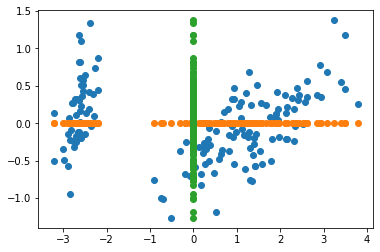

In [60]:

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_trns = pca.transform(X)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pca.components_)
print('Eigenvalues or explained variance')
print(pca.explained_variance_)
plt.scatter(X_trns[:,:1],X_trns[:,1:2])
plt.scatter(X_trns[:,:1], np.zeros(len(X_trns[:,:1])))
plt.scatter(np.zeros(len(X_trns[:,1:2])),X_trns[:,1:2])
print(len(X_trns[:,:1]))

From 4 to 1

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=179)


In [62]:
pca = decomposition.PCA(n_components=1)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print("Accuracy : ",gnb.score(X_test_pca,y_test)*100) 
from sklearn.metrics import precision_score,recall_score
y_pred = gnb.predict(X_test_pca)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

(1, 4)
(120, 1) (30, 1)
Accuracy :  96.66666666666667
Precision is:  0.9696969696969696
Recall is:  0.9666666666666667


Projection in 1D

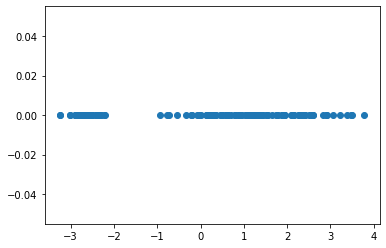

In [63]:
X_trns = pca.transform(X)
plt.scatter(X_trns,np.zeros(len(X_trns)))
